In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
landscape = pandas.read_excel("data.xlsx", sheet_name=1)

In [8]:
landscape

,ShortName,structure_axis_weighted_avg,content_axis_weighted_avg
0,ARCO,"0,1790528679","0,78392045455"
1,FondazioneZeri,"0,2356574799","0,75208333333"
2,Nomisma,"0,2238924249","0,74750000000"
3,Wikidata,"0,4576340617","0,85840206186"
4,SARI,"0,3364470665","0,61366465863"
5,Europeana,"0,4276028905","0,35240926500"
6,ND_Hungary,"0,03703703704","0,33458333333"
7,DBpedia,"0,3534944481","0,68958333333"
8,YAGO,"0,2705441108","0,73625000000"


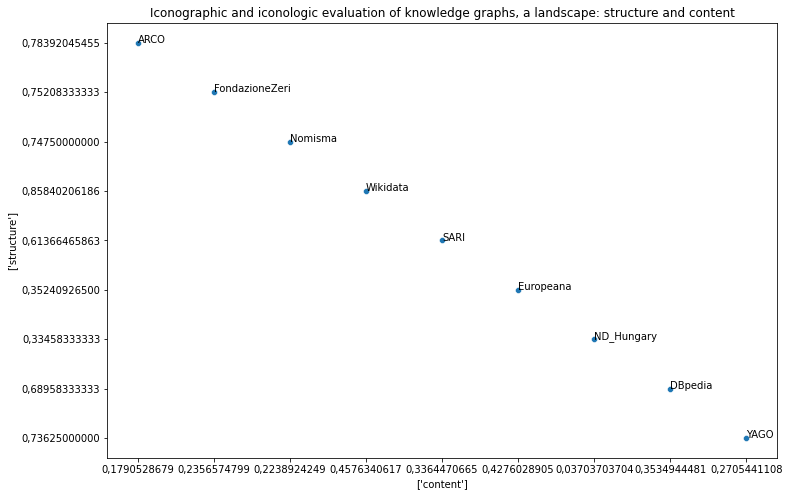

In [16]:

plt.figure(figsize=(12,8))
sns.scatterplot(data=landscape, x='structure_axis_weighted_avg', y='content_axis_weighted_avg')
plt.title("Iconographic and iconologic evaluation of knowledge graphs, a landscape: structure and content")
plt.xlabel(['content'])
plt.ylabel(['structure'])
          
for i in range(landscape.shape[0]):
          plt.text(landscape.structure_axis_weighted_avg[i], y=landscape.content_axis_weighted_avg[i], s=landscape.ShortName[i])

plt.show()

In [26]:
def quadrant_chart(x, y, xtick_labels=None, ytick_labels=None, data_labels=None,
 highlight_quadrants=None, ax=None):
    """
    Create the classic four-quadrant chart.
    Args:
        x -- array-like, the x-coordinates to plot
        y -- array-like, the y-coordinates to plot
        xtick_labels -- list, default: None, a two-value list xtick labels
        ytick_labels -- list, default: None, a two-value list of ytick labels
        data_labels -- array-like, default: None, data point annotations
        highlight_quadrants -- list, default: None, list of quadrants to
            emphasize (quadrants are numbered 1-4)
        ax -- matplotlib.axes object, default: None, the user can pass their own
            axes object if desired
    """
    # allow user to specify their own axes
    ax = ax if ax else plt.axes()

    data = pd.DataFrame({'x': x, 'y': y, 'data_labels': data_labels})

    # calculate averages up front to avoid repeated calculations
    y_avg = 0.5
    x_avg = 0.5

    # set x limits
    adj_x = max((data['x'].max() - x_avg), (x_avg - data['x'].min())) * 1.1
    lb_x, ub_x = (x_avg - adj_x, x_avg + adj_x)
    ax.set_xlim(lb_x, ub_x)

    # set y limits
    adj_y = max((data['y'].max() - y_avg), (y_avg - data['y'].min())) * 1.1
    lb_y, ub_y = (y_avg - adj_y, y_avg + adj_y)
    ax.set_ylim(lb_y, ub_y)

    # set x tick labels
    if xtick_labels:
        ax.set_xticks([(x_avg - adj_x / 2), (x_avg + adj_x / 2)])
        ax.set_xticklabels(xtick_labels)

    # set y tick labels
    if ytick_labels:
        ax.set_yticks([(y_avg - adj_y / 2), (y_avg + adj_y / 2)])
        ax.set_yticklabels(ytick_labels, rotation='vertical', va='center')

    # determine which points to highlight
    if highlight_quadrants:
        quadrants = []
        for x_val, y_val in zip(x, y):
            q = []
            if (x_val >= 0.5) and (y_val >= 0.5):
                q.append(1)
            if (x_val <= 0.5) and (y_val >= 0.5):
                q.append(2)
            if (x_val <= 0.5) and (y_val <= 0.5):
                q.append(3)
            if (x_val >= 0.5) and (y_val <= 0.5):
                q.append(4)
            quadrants.append(q)
        data['quadrant'] = quadrants

        # boolean mask - True = highlight, False = don't highlight
        highlight = data['quadrant'].apply(lambda q: len(set(
        highlight_quadrants) & set(q)) > 0)

        # plot the non-highlighted points within the conditional block
        ax.scatter(data['x'][~highlight], data['y'][~highlight], alpha=0.5,
        c='lightblue', edgecolor='darkblue', zorder=99)
        data = data[highlight]

    # plot remaining points and quadrant lines
    ax.scatter(x=data['x'], y=data['y'], c='lightblue', edgecolor='darkblue',
    zorder=99)
    ax.axvline(x_avg, c='k', lw=1)
    ax.axhline(y_avg, c='k', lw=1)

    # add data labels
    for ix, row in data.iterrows():
        ax.annotate(row['data_labels'], (row['x'], row['y']), xytext=(2, 5),
        textcoords='offset pixels')

def quadrant_chart2(x, y, xtick_labels=None, ytick_labels=None, data_labels=None,
 highlight_quadrants=None, ax=None):
    """
    Create the classic four-quadrant chart.
    Args:
        x -- array-like, the x-coordinates to plot
        y -- array-like, the y-coordinates to plot
        xtick_labels -- list, default: None, a two-value list xtick labels
        ytick_labels -- list, default: None, a two-value list of ytick labels
        data_labels -- array-like, default: None, data point annotations
        highlight_quadrants -- list, default: None, list of quadrants to
            emphasize (quadrants are numbered 1-4)
        ax -- matplotlib.axes object, default: None, the user can pass their own
            axes object if desired
    """
    # allow user to specify their own axes
    ax = ax if ax else plt.axes()

    data = pd.DataFrame({'x': x, 'y': y, 'data_labels': data_labels})

    # calculate averages up front to avoid repeated calculations
    y_avg = data['y'].mean()
    x_avg = data['x'].mean()

    # set x limits
    adj_x = max((data['x'].max() - x_avg), (x_avg - data['x'].min())) * 1.1
    lb_x, ub_x = (x_avg - adj_x, x_avg + adj_x)
    ax.set_xlim(lb_x, ub_x)

    # set y limits
    adj_y = max((data['y'].max() - y_avg), (y_avg - data['y'].min())) * 1.1
    lb_y, ub_y = (y_avg - adj_y, y_avg + adj_y)
    ax.set_ylim(lb_y, ub_y)

    # set x tick labels
    if xtick_labels:
        ax.set_xticks([(x_avg - adj_x / 2), (x_avg + adj_x / 2)])
        ax.set_xticklabels(xtick_labels)

    # set y tick labels
    if ytick_labels:
        ax.set_yticks([(y_avg - adj_y / 2), (y_avg + adj_y / 2)])
        ax.set_yticklabels(ytick_labels, rotation='vertical', va='center')

    # determine which points to highlight
    if highlight_quadrants:
        quadrants = []
        for x_val, y_val in zip(x, y):
            q = []
            if (x_val >= x_avg) and (y_val >= y_avg):
                q.append(1)
            if (x_val <= x_avg) and (y_val >= y_avg):
                q.append(2)
            if (x_val <= x_avg) and (y_val <= y_avg):
                q.append(3)
            if (x_val >= x_avg) and (y_val <= y_avg):
                q.append(4)
            quadrants.append(q)
        data['quadrant'] = quadrants

        # boolean mask - True = highlight, False = don't highlight
        highlight = data['quadrant'].apply(lambda q: len(set(
        highlight_quadrants) & set(q)) > 0)

        # plot the non-highlighted points within the conditional block
        ax.scatter(data['x'][~highlight], data['y'][~highlight], alpha=0.5,
        c='lightblue', edgecolor='darkblue', zorder=99)
        data = data[highlight]

    # plot remaining points and quadrant lines
    ax.scatter(x=data['x'], y=data['y'], c='lightblue', edgecolor='darkblue',
    zorder=99)
    ax.axvline(x_avg, c='k', lw=1)
    ax.axhline(y_avg, c='k', lw=1)

    # add data labels
    for ix, row in data.iterrows():
        ax.annotate(row['data_labels'], (row['x'], row['y']), xytext=(2, 5),
        textcoords='offset pixels')

Text(0.5, 0, 'Structure Evaluation')

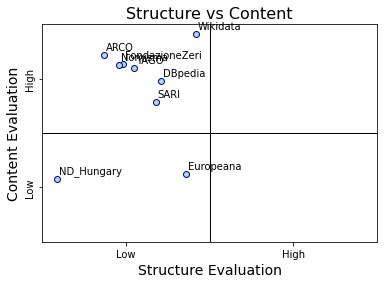

In [27]:
valuesx = landscape["structure_axis_weighted_avg"]
valuesx = [float(val.replace(",",".")) for val in valuesx]
valuesy = landscape["content_axis_weighted_avg"]
valuesy = [float(val.replace(",",".")) for val in valuesy]
quadrant_chart(

    x=valuesx,
    y=valuesy,
    xtick_labels=['Low', 'High'],
    ytick_labels=['Low', 'High'],
    data_labels=landscape["ShortName"],
    highlight_quadrants=[1,2,3,4]
)
plt.title('Structure vs Content', fontsize=16)
plt.ylabel('Content Evaluation', fontsize=14)
plt.xlabel('Structure Evaluation', fontsize=14)